In [1]:
import numpy as np
import pandas as pd
import sys
import os
from keras.applications.mobilenet_v2 import MobileNetV2  # Using MobileNetV2 as an example
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical

# Paths to your datasets in Google Drive
# Paths to your datasets
traindir = "C:/Users/ALOK DALVI/Desktop/New folder/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train"
validdir = "C:/Users/ALOK DALVI/Desktop/New folder/archive/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid"
testdir = "C:/Users/ALOK DALVI/Desktop/New folder/archive/test"


# Load your pretrained MobileNetV2 model
mobilenet_model = MobileNetV2(include_top=False, input_shape=(224, 224, 3))
for layer in mobilenet_model.layers:
    layer.trainable = False

# Create a Faster R-CNN model on top of MobileNetV2 backbone
def create_faster_rcnn_model(base_model, num_classes):
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(1024, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=predictions)
    return model

# Initialize the Faster R-CNN model
num_classes = len(os.listdir(traindir))  # Number of classes based on your dataset structure
faster_rcnn_model = create_faster_rcnn_model(mobilenet_model, num_classes)
faster_rcnn_model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='categorical_crossentropy', metrics=['accuracy'])

# Data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    width_shift_range=0.1,
    height_shift_range=0.1,
    fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 64  # Smaller batch size to save memory
training_set = train_datagen.flow_from_directory(
    traindir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

valid_set = valid_datagen.flow_from_directory(
    validdir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical')

train_num = training_set.samples
valid_num = valid_set.samples

# Set up callbacks for early stopping and learning rate reduction
early_stopping = EarlyStopping(patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(factor=0.2, patience=2)

# Train your Faster R-CNN model
epochs = 20  # Adjust this based on your requirements
history = faster_rcnn_model.fit(
    training_set,
    steps_per_epoch=train_num // batch_size,
    epochs=epochs,
    validation_data=valid_set,
    validation_steps=valid_num // batch_size,
    callbacks=[early_stopping, reduce_lr]
)



Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.
Epoch 1/20
1098/1098 [==============================] - 2136s 2s/step - loss: 0.9310 - accuracy: 0.7840 - val_loss: 0.4677 - val_accuracy: 0.8743 - lr: 0.0010
Epoch 2/20
1098/1098 [==============================] - 2232s 2s/step - loss: 0.3615 - accuracy: 0.8981 - val_loss: 0.3707 - val_accuracy: 0.8879 - lr: 0.0010
Epoch 3/20
1098/1098 [==============================] - 2297s 2s/step - loss: 0.2820 - accuracy: 0.9188 - val_loss: 0.2934 - val_accuracy: 0.9125 - lr: 0.0010
Epoch 4/20
1098/1098 [==============================] - 2228s 2s/step - loss: 0.2443 - accuracy: 0.9278 - val_loss: 0.2839 - val_accuracy: 0.9118 - lr: 0.0010
Epoch 5/20
1098/1098 [==============================] - 4475s 4s/step - loss: 0.2210 - accuracy: 0.9329 - val_loss: 0.2561 - val_accuracy: 0.9211 - lr: 0.0010
Epoch 6/20
1098/1098 [==============================] - 1577s 1s/step - loss: 0.2024 - accuracy: 0.9394 - val_loss: 0

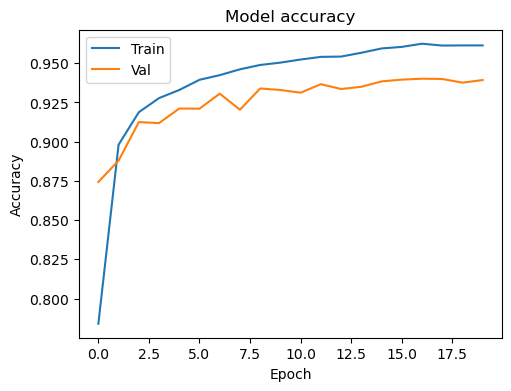

In [2]:
import matplotlib.pyplot as plt
# Plot the training/validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')

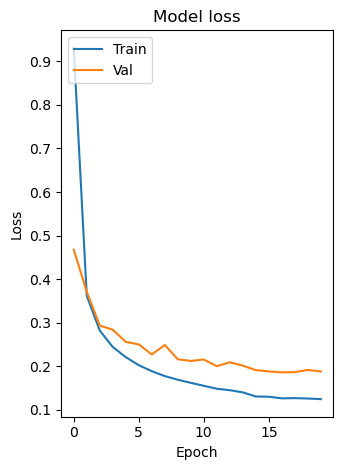

In [3]:
# Plot the training/validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.tight_layout()
plt.show()

In [11]:
from keras.models import Model, load_model 
from keras.preprocessing.image import load_img, img_to_array

In [12]:
# Save the trained model using the native Keras format
model_save_path = "plant_disease_faster_rcnn_model.keras"
faster_rcnn_model.save(model_save_path)
 

In [14]:
class_labels = ['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

In [15]:
# Load the trained model
loaded_model = load_model(model_save_path)

In [16]:
loaded_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 112, 112, 32)         0         ['bn_Conv1[0][0]']        

In [17]:
# Evaluate the model
evaluation = loaded_model.evaluate(valid_set, steps=valid_num // batch_size)
print("Validation Loss:", evaluation[0])
print("Validation Accuracy:", evaluation[1])

# Make predictions using the loaded model
def predict_disease(image_path):
    img = load_img(image_path, target_size=(224, 224))
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0
    
    prediction = loaded_model.predict(img_array)
    predicted_class = class_labels[np.argmax(prediction)]
    
    return predicted_class


274/274 [==============================] - 149s 540ms/step - loss: 0.1863 - accuracy: 0.9401
Validation Loss: 0.1863342672586441
Validation Accuracy: 0.9400661587715149


In [18]:
# Example: Make predictions for an image
test_image_path = "C:/Users/ALOK DALVI/Desktop/l.jpg"
predicted_disease = predict_disease(test_image_path)
print("Predicted Disease:", predicted_disease)


1/1 [==============================] - 1s 521ms/step
Predicted Disease: Apple___Black_rot
